# Checking Accuracy Score of KNearestNeighbors Model with Different Metrices

In [1]:
# import libraries and dataset
import pandas as pd
df = pd.read_csv('weight-height.csv')

In [2]:
# exploratory data analysis
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df['Gender'] = df['Gender'].replace("Male", 1)
df['Gender'] = df['Gender'].replace("Female", 0)
df.head(5)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [4]:
# Selection of input and output variables
X = df.iloc[:, 1:3]
y = df.iloc[:, 0:1]
print(X.head())
print(y.head())

      Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801
   Gender
0       1
1       1
2       1
3       1
4       1


In [5]:
# import the model and train it
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5).fit(X, y)

C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
# prediction
prediction = model.predict([[70, 150]])
prediction

C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [11]:
# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into test and train data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model training
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# predictions
predicted_values = model.predict(X_test)
predicted_values

C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

# Accuracy Scores

## Classification Accuracy
- It is mostly used metrix for measuring the accuracy of a classification model
- However, alone this accuracy metrix is not sufficient
- Most importantly, it is not suitable for a training set that is dominant by one class

In [12]:
score = accuracy_score(y_test, predicted_values)
print("The Accuracy Score of Our Model is:", score)

The Accuracy Score of Our Model is: 0.908


## Confusion Metrix

Compute confusion matrix to evaluate the accuracy of a classification.

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_values)

array([[937,  86],
       [ 98, 879]], dtype=int64)

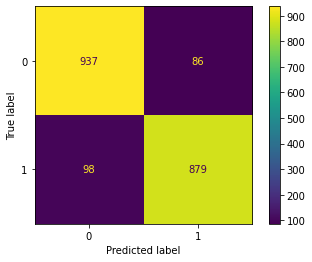

In [15]:
# we can also display the confusion metrix with a plot
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predicted_values)
plt.show()

## Jaccard Score

- Also known as Jaccard similarity coefficient is a metrix to identify the similarity of the two sets 
- It is defined as the size of intersection (common) of the two sets divided by the size of the union of the same two sets and multiplied by 100 
- This metrix is used to compare set of predicted values for a sample to the corresponding set of true values

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, predicted_values)

0.8269049858889934

## F1_Score
- The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 
- The relative contribution of precision and recall to the F1 score are equal. 
- The formula for the F1 score is:
  
            F1 = 2 * (precision * recall) / (precision + recall)


- In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, predicted_values)

0.9052523171987642

## Area Under the Receiver Operating Characteristic Curve (ROC AUC)
- Use it when the data has almost equal proportions of classes (means no bias)

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predicted_values)

0.907813233200363

## Logarithmic Loss (log-loss)
- Works well for multi class training dataset
- It measures the accuracy of classfication model by returning output in the range of 0 to infinity
- Closer to 0 means that the model is highly accurate, whereas going away from zero shows that the model is less accurate


In [21]:
from sklearn.metrics import log_loss
score = log_loss(y_test, predicted_values)
score

3.177601811021282

## Mean Absolute Error
- MAE is an accuracy matrix, which is the average of the absolute differences between the true values of responce variable and the predicted outcomes 
- It determines how far the predicted points are placed from the actual/true plot
- The best value for MAE is 0. The higher the value of MAE shows that the predictions are away from the actual, and hence the model is less accurate

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predicted_values)

0.092

## Mean Squared Error
- This metrix is mean of the squared differences between the true values of responce variable and the predicted outcomes

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_values)

0.092